# Lab 4 - Heaps
## Ryley Powell
## CS3851 - 021

# Introduction
The objective of the lab was to implement the various methods around the max-heap data structure and then benchmark those implementations under various conditions.

Below is a summary of the benchmarks performed for this lab.

|               Case              |      100 Elements      |    1,000 Elements    |   10,000 Elements   |  100,000 Elements  |
|:-------------------------------:|:----------------------:|:--------------------:|:-------------------:|:------------------:|
|  Max Heap Insert - Sorted Case  |  0.004409089999984417  |  0.3668711700000017  |  10.975066710000004 |     86.25539782    |
|  Max Heap Insert - Random Case  |  0.006649629999992612  |  0.3792429400000003  |  24.32510264000001  |  89.64834246999999 |
| Max Heap Insert - Reversed Case |  0.0006372099999964575 | 0.016185959999995704 |  0.3427093699999887 |  5.848737889999984 |
|   Build Max Heap - Sorted Case  |  0.0007087799999908384 | 0.012536529999999857 |  0.6572657400000139 |  8.235948619999977 |
|   Build Max Heap - Random Case  |  0.0006142699999827528 | 0.012507730000004358 |  0.6465753600000198 |  8.161034730000006 |
|  Build Max Heap - Reversed Case | 0.00025509000003012263 | 0.005879029999971408 | 0.14293733999999175 |  2.418698340000026 |
|  Extract Max Heap - Random Case |  0.0009065000000077816 | 0.019680440000024647 |  1.4100713399999791 | 37.309081389999996 |

# Benchmarking

In [7]:
import threading
import numpy as num
from threaded_benchmarks import threaded_insert, threaded_build_heap, threaded_extract_max

numbers = [100, 1000, 10000, 100000]
# numbers = [100, 1000, 10000]
# numbers = [100, 1000]
# numbers = [10]
sorted_case = []
random_case = []
reversed_case = []

insertion_sorted_avg = []
insertion_random_avg = []
insertion_reversed_avg = []

build_sorted_avg = []
build_random_avg = []
build_reversed_avg = []

extract_random_avg = []

threads = []

# do max-heap-insert trials
for i in numbers:
    for j in range(0, 10):
        t = threading.Thread(target=threaded_insert, args=(i, sorted_case, random_case, reversed_case))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
        # print(t, ' is done')            
    insertion_sorted_avg.append(num.mean(sorted_case))
    insertion_random_avg.append(num.mean(random_case))
    insertion_reversed_avg.append(num.mean(reversed_case))
    
    # clear working lists
    threads.clear()
    sorted_case.clear()
    random_case.clear()
    reversed_case.clear()
    
print("Max Heap Insert - Sorted Case: ", insertion_sorted_avg)
print("Max Heap Insert - Random Case: ", insertion_random_avg)
print("Max Heap Insert - Reversed Case: ", insertion_reversed_avg)

    
# do build-max-heap trails
for i in numbers:
    for j in range(0, 10):
        t = threading.Thread(target=threaded_build_heap, args=(i, sorted_case, random_case, reversed_case))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
        # print(t, ' is done')            
    build_sorted_avg.append(num.mean(sorted_case))
    build_random_avg.append(num.mean(random_case))
    build_reversed_avg.append(num.mean(reversed_case))
    
    # clear working lists
    threads.clear()
    sorted_case.clear()
    random_case.clear()
    reversed_case.clear()

print("Build Max Heap - Sorted Case: ", build_sorted_avg)
print("Build Max Heap - Random Case: ", build_random_avg)
print("Build Max Heap - Reversed Case: ", build_reversed_avg)

# do extract-max trials
for i in numbers:
    for j in range(0, 10):
        t = threading.Thread(target=threaded_extract_max, args=(i, random_case))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
        # print(t, ' is done')            
    extract_random_avg.append(num.mean(random_case))
    
    # flush working threads
    threads.clear()
    sorted_case.clear()
    random_case.clear()
    reversed_case.clear()

print("Extract Max Heap - Random Case: ", extract_random_avg)

Max Heap Insert - Sorted Case:  [0.004409089999984417, 0.3668711700000017, 10.975066710000004, 86.25539782]
Max Heap Insert - Random Case:  [0.006649629999992612, 0.3792429400000003, 24.32510264000001, 89.64834246999999]
Max Heap Insert - Reversed Case:  [0.0006372099999964575, 0.016185959999995704, 0.3427093699999887, 5.848737889999984]
Build Max Heap - Sorted Case:  [0.0007087799999908384, 0.012536529999999857, 0.6572657400000139, 8.235948619999977]
Build Max Heap - Random Case:  [0.0006142699999827528, 0.012507730000004358, 0.6465753600000198, 8.161034730000006]
Build Max Heap - Reversed Case:  [0.00025509000003012263, 0.005879029999971408, 0.14293733999999175, 2.418698340000026]
Extract Max Heap - Random Case:  [0.0009065000000077816, 0.019680440000024647, 1.4100713399999791, 37.309081389999996]


# Plots
## Max-Heap-Insert

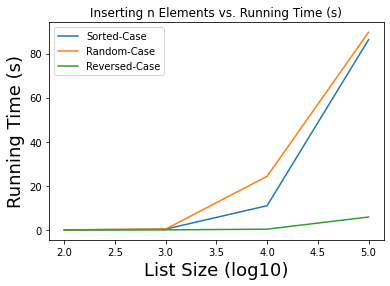

In [8]:
import matplotlib.pyplot as mat
mat.figure(0)
mat.plot(num.log10(numbers), insertion_sorted_avg, label='Sorted-Case')
mat.plot(num.log10(numbers), insertion_random_avg, label='Random-Case')
mat.plot(num.log10(numbers), insertion_reversed_avg, label='Reversed-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Max-Heap-Insert: Case Evaluation')
mat.legend()
mat.show()

## Max-Heap-Insert vs. Build-Max-Heap

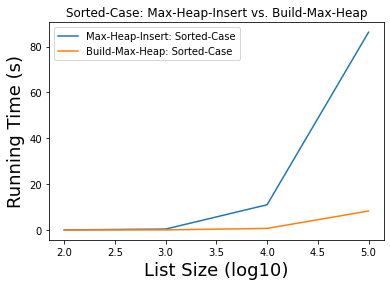

In [11]:
mat.figure(1)
mat.plot(num.log10(numbers), insertion_sorted_avg, label='Max-Heap-Insert: Sorted-Case')
mat.plot(num.log10(numbers), build_sorted_avg, label='Build-Max-Heap: Sorted-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Sorted-Case: Max-Heap-Insert vs. Build-Max-Heap')
mat.legend()
mat.show()

mat.figure(2)
mat.plot(num.log10(numbers), insertion_random_avg, label='Max-Heap-Insert: Random-Case')
mat.plot(num.log10(numbers), build_random_avg, label='Build-Max-Heap: Random-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Random-Case: Max-Heap-Insert vs. Build-Max-Heap')
mat.legend()
mat.show()

mat.figure(3)
mat.plot(num.log10(numbers), insertion_reversed_avg, label='Max-Heap-Insert: Reversed-Case')
mat.plot(num.log10(numbers), build_reversed_avg, label='Build-Max-Heap: Reversed-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Reversed-Case: Max-Heap-Insert vs. Build-Max-Heap')
mat.legend()
mat.show()

## Max-Heap-Insert vs. Heap-Extract-Max

In [12]:
mat.figure(4)
mat.plot(num.log10(numbers), insertion_random_avg, label='Max-Heap-Insert: Random-Case')
mat.plot(num.log10(numbers), extract_random_avg, label='Heap-Extract-Max: Random-Case')
mat.xlabel('List Size (log10)', fontsize=18)
mat.ylabel('Running Time (s)', fontsize=18)
mat.title('Random-Case: Max-Heap-Insert vs. Heap-Extract-Max')
mat.legend()
mat.show()

# Questions
## 1. Does the heap creation run time vary between the three scenarios?  Which cases are the best-, average-, and worst-cases?
From the times recorded by running Build-Max-Heap on the different scenarios containing 100,000 elements, the time varies only slightly between the Sorted-Case and Random-Case (about 0.1 seconds) as compared to the Reversed-Case which differs by about 6 seconds to the former cases.
As for the best-case scenario, it depends on whether it is a min or max heap, and whether the data is sorted in ascending or descending order. The best-case for a max-heap is the data is sorted in descending order, and the best-case scenario for a min-heap is the data being sorted in ascending order.
## 2. Why do you think the best case is faster than the worst case?  (Hint: think about how a single element is added to the heap and the process for "bubbling" that element up or down to maintain the heap invariant property.)
The Reversed-Sorted Case (best-case for max-heap) is faster than the Sorted-Case (worst-case for max-heap) because of how the \_max\_heapify() function is implemented. Since the given array is in descending order already, the three comparisons will always fail,
and thus the eliminates the log(n) component of the time complexity and leaving only a pure O(n) within some constant value. As compared the sorted-case (worst-case), where the recursion of the \_max\_heapify() comes into play for the total running time.
## 3. Which is faster: building the entire heap at once or inserting one element at a time?  Why? 
Building the entire heap is faster as the entire data-set is known and therefore can be manipulated at once, where inserting elements one-by-one must be added to the bottom, and then bubbled-up each time for each elements.
## 4. Is extracting an element from or inserting an element into the heap faster?  Why?
Extracting the maximum value from the heap is faster than inserting an element into the heap. Extracting the max value involves remove the first element, inserting the last element in the first index, and then bubbling-down until the max-heap property is satisfied, where inserting into the max-heap requires more swaps to be made to satisfy the max-heap property.